In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [1]:
import warnings
warnings.filterwarnings("ignore")

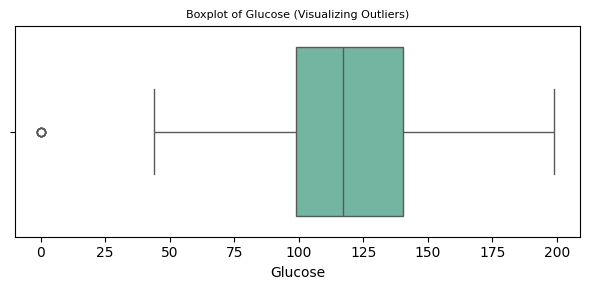

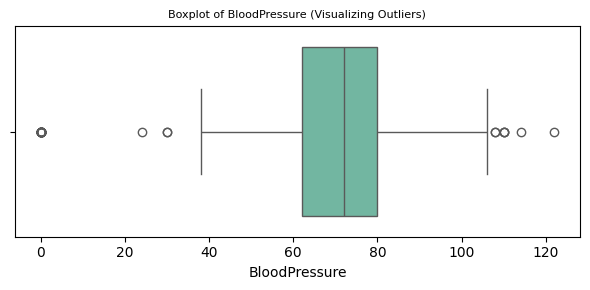

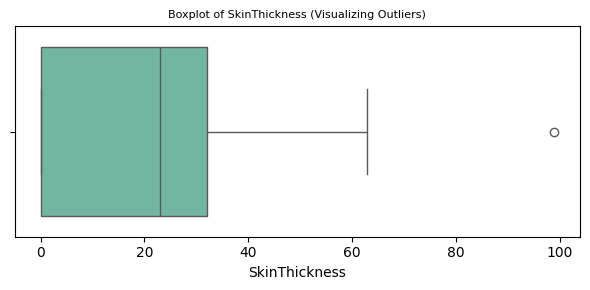

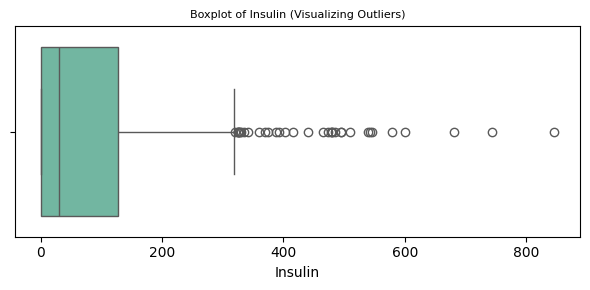

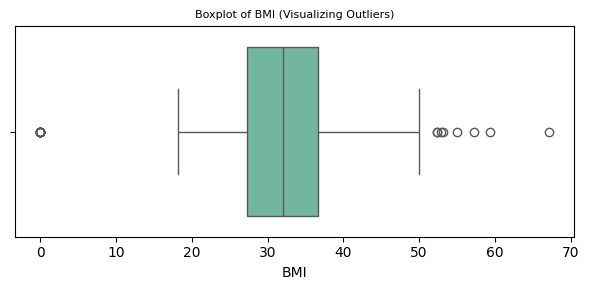

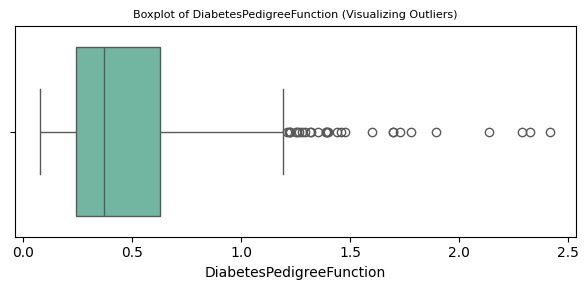

In [6]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f"Boxplot of {col} (Visualizing Outliers)", fontsize=8)
    plt.tight_layout()
    plt.show()


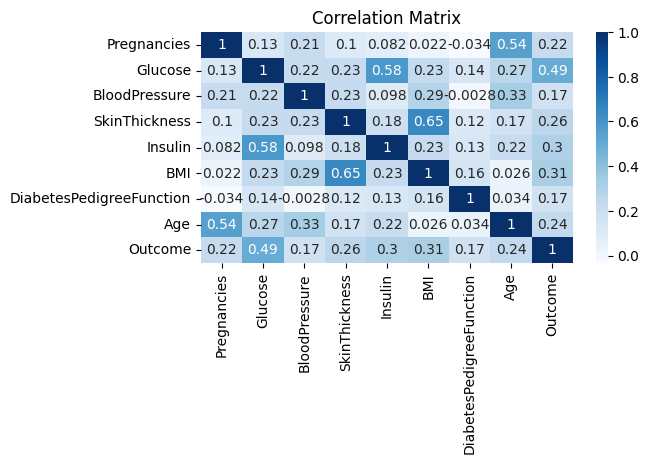

In [ ]:
numeric_df = df.select_dtypes(include="number")
numeric_df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
for i in ["BloodPressure","BMI"]:
    df[i].fillna(df[i].median(), inplace=True)

df["Glucose"].fillna(df[i].mean(), inplace=True)

from sklearn.impute import KNNImputer

impute = KNNImputer()
for i in ["SkinThickness", "Insulin"]:
    df[i] = impute.fit_transform(df[[i]])

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [ ]:
for i in ["SkinThickness","Insulin","BMI"]:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])
lw, uw = wisker(df["BloodPressure"])
df["BloodPressure"] = np.where(df["BloodPressure"] < lw, lw, df["BloodPressure"])

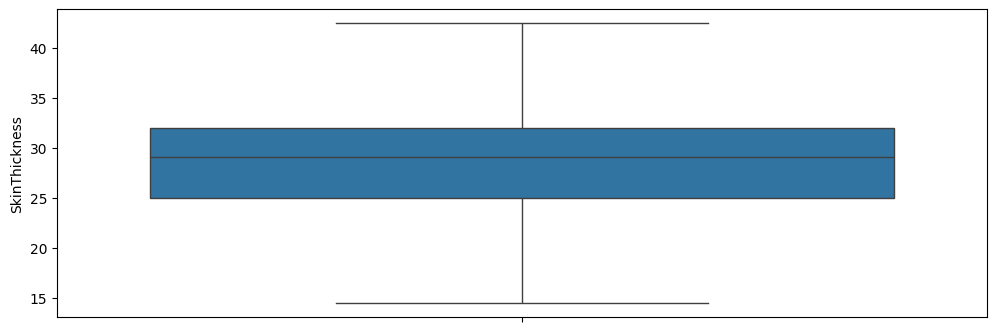

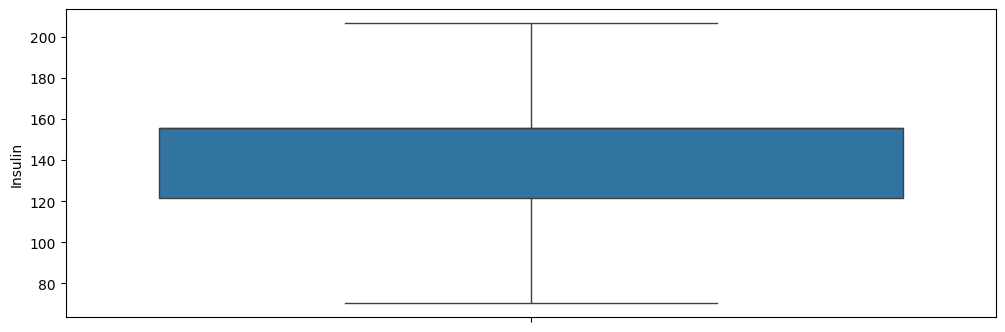

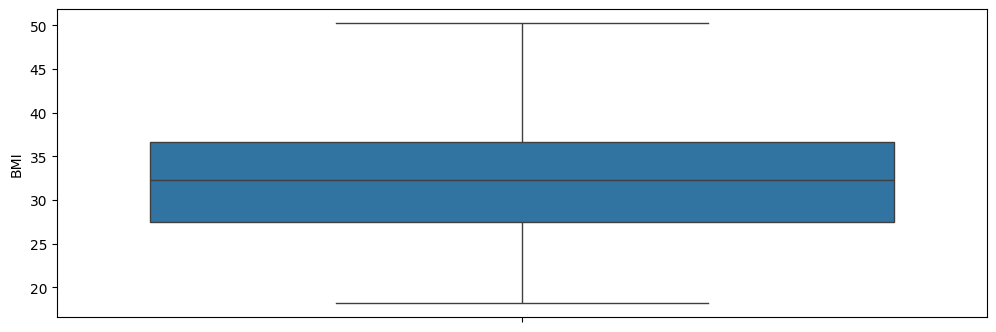

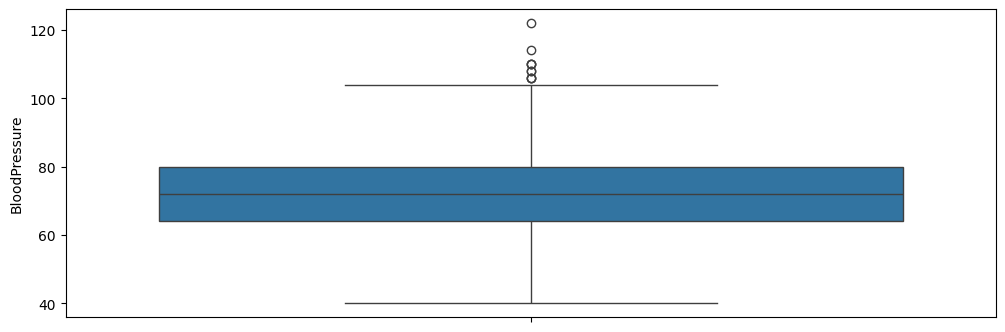

In [ ]:
for i in ['SkinThickness', 'Insulin','BMI',"BloodPressure"]:
    plt.figure(figsize=(12, 4))
    sns.boxplot(df[i])
    plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df[df.select_dtypes(include="number").columns]))
print(scaler.transform(df[df.select_dtypes(include="number").columns]))

StandardScaler()
[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]
